In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [4]:
input_file = "Stock Data"  # Replace with your file
df = pd.read_csv(input_file)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [6]:
df['Tomorrow_Close'] = df['Close'].shift(-1)
df['Movement'] = np.where(df['Tomorrow_Close'] > df['Close'], 1, 0)


In [7]:
df = df.dropna(subset=['Tomorrow_Close'])

In [8]:
features = ['Open', 'High', 'Close', 'Volume']
X = df[features]
y = df['Movement']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        23
           1       0.68      0.56      0.61        27

    accuracy                           0.62        50
   macro avg       0.63      0.63      0.62        50
weighted avg       0.63      0.62      0.62        50



In [11]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
   Feature  Importance
2   Close    0.271363
3  Volume    0.270287
0    Open    0.245752
1    High    0.212598


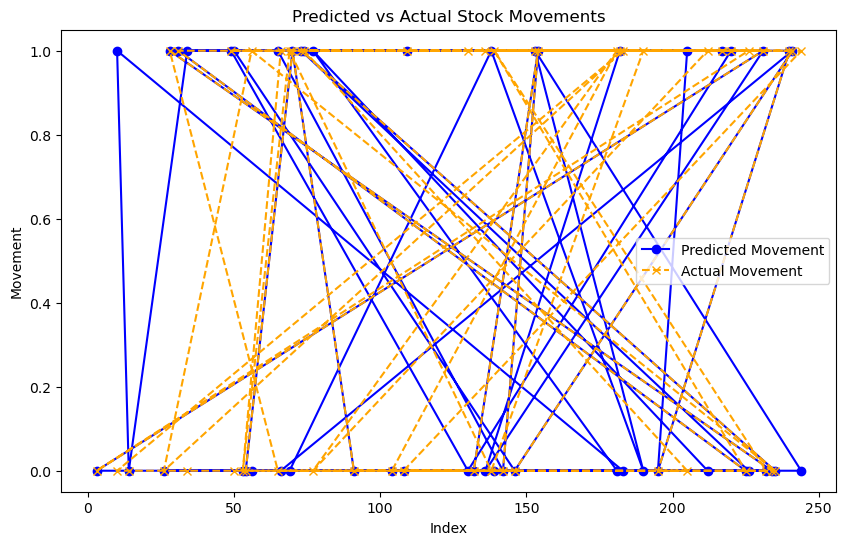

In [12]:
import matplotlib.pyplot as plt

# Adding predictions to the original test set
X_test['Prediction'] = y_pred
X_test['Actual'] = y_test.values

# Plotting predicted vs. actual movements
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test['Prediction'], label='Predicted Movement', color='blue', marker='o')
plt.plot(X_test.index, X_test['Actual'], label='Actual Movement', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Index')
plt.ylabel('Movement')
plt.title('Predicted vs Actual Stock Movements')
plt.legend()
plt.show()
